# Sonar signal classification using ANN

The task is to train a network to discriminate between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock.

#### Data Set Information:

The file "sonar.mines" contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions. The file "sonar.rocks" contains 97 patterns obtained from rocks under similar conditions. The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("sonar_dataset.csv",header= None)
pd.set_option('display.max_columns', None)

#### Our dataset doesn't have any column header

In [3]:
df.shape

(208, 61)

In [4]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

<AxesSubplot:>

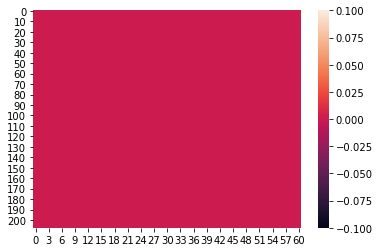

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [8]:
df[60].unique()

array(['R', 'M'], dtype=object)

### Here 'R' indicate rock and 'M' indicates metal.

In [9]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [10]:
X = df.drop(60, axis=1)
Y = df[60]

In [11]:
Y = pd.get_dummies(Y, drop_first=True)

In [12]:
Y.sample(5)

,R
79,1
101,0
6,1
43,1
150,0


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

### Using ANN without dropout layer

In [14]:
import tensorflow
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=8)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 156 samples
Epoch 1/100
156/156 [==============================] - 0s 2ms/sample - loss: 0.6856 - acc: 0.5385
Epoch 2/100
156/156 [==============================] - 0s 1ms/sample - loss: 0.6664 - acc: 0.5962
Epoch 3/100
156/156 [==============================] - 0s 1ms/sample - loss: 0.6511 - acc: 0.6603
Epoch 4/100
156/156 [==============================] - 0s 1ms/sample - loss: 0.6427 - acc: 0.6474
Epoch 5/100
156/156 [==============================] - 0s 1ms/sample - loss: 0.6309 - acc: 0.6987
Epoch 6/100
156/156 [==============================] - 0s 1ms/sample - loss: 0.5926 - acc: 0.6923
Epoch 7/100
156/156 [==============================] - 0s 1ms/sample - loss: 0.5617 - acc: 0.7564
Epoch 8/100
156/156 [==============================] - 0s 1ms/sample - loss: 0.5349 - acc: 0.7436
Epoch 9/100
156/156 

156/156 [==============================] - 0s 1ms/sample - loss: 0.0128 - acc: 1.0000
Epoch 77/100
156/156 [==============================] - 0s 1ms/sample - loss: 0.0118 - acc: 1.0000
Epoch 78/100
156/156 [==============================] - 0s 1ms/sample - loss: 0.0096 - acc: 1.0000
Epoch 79/100
156/156 [==============================] - 0s 1ms/sample - loss: 0.0099 - acc: 1.0000
Epoch 80/100
156/156 [==============================] - 0s 1ms/sample - loss: 0.0114 - acc: 1.0000
Epoch 81/100
156/156 [==============================] - 0s 1ms/sample - loss: 0.0094 - acc: 1.0000
Epoch 82/100
156/156 [==============================] - 0s 1ms/sample - loss: 0.0242 - acc: 1.0000
Epoch 83/100
156/156 [==============================] - 0s 1ms/sample - loss: 0.0154 - acc: 1.0000
Epoch 84/100
156/156 [==============================] - 0s 1ms/sample - loss: 0.0135 - acc: 1.0000
Epoch 85/100
156/156 [==============================] - 0s 1ms/sample - loss: 0.0077 - acc: 1.0000
Epoch 86/100
156/156 [=

In [15]:
model.evaluate(X_test, y_test)

52/52 [==============================] - 0s 558us/sample - loss: 0.9014 - acc: 0.7500


[0.9014018911581773, 0.74999994]

## we can see here our model gets 100% accuracy in train set but only 74% in test set this is because of over fitting
### Training Accuracy >>> Test Accuracy

In [16]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

[1.94415361e-06 9.75675166e-01 9.83121157e-01 1.29966109e-04
 1.00000000e+00 9.96559322e-01 4.11564410e-01 1.00000000e+00
 1.10754496e-04 1.00000000e+00]
[0. 1. 1. 0. 1. 1. 0. 1. 0. 1.]


In [17]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79        27
           1       0.83      0.60      0.70        25

    accuracy                           0.75        52
   macro avg       0.77      0.74      0.74        52
weighted avg       0.77      0.75      0.74        52



## ANN with dropout layer

#### What is dropout layer?
The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. ... Note that the Dropout layer only applies when training is set to True such that no values are dropped during inference. When using model.

#### Why do we need dropout layer?
It is Simple Way to Prevent Neural Networks from Overfitting. Because the outputs of a layer under dropout are randomly subsampled, it has the effect of reducing the capacity or thinning the network during training. As such, a wider network, e.g. more nodes, may be required when using dropout.

![](dropoutlayer.png)

In [18]:
model2 = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.fit(X_train, y_train, epochs=100, batch_size=8)

Train on 156 samples
Epoch 1/100
156/156 [==============================] - 0s 3ms/sample - loss: 0.7098 - acc: 0.4872
Epoch 2/100
156/156 [==============================] - 0s 2ms/sample - loss: 0.7056 - acc: 0.5000
Epoch 3/100
156/156 [==============================] - 0s 2ms/sample - loss: 0.7011 - acc: 0.5449
Epoch 4/100
156/156 [==============================] - 0s 2ms/sample - loss: 0.6802 - acc: 0.4872
Epoch 5/100
156/156 [==============================] - 0s 2ms/sample - loss: 0.7106 - acc: 0.5449
Epoch 6/100
156/156 [==============================] - 0s 2ms/sample - loss: 0.7049 - acc: 0.5128
Epoch 7/100
156/156 [==============================] - 0s 2ms/sample - loss: 0.6844 - acc: 0.5513
Epoch 8/100
156/156 [==============================] - 0s 2ms/sample - loss: 0.6711 - acc: 0.5192
Epoch 9/100
156/156 [==============================] - 0s 2ms/sample - loss: 0.6929 - acc: 0.5128
Epoch 10/100
156/156 [==============================] - 0s 2ms/sample - loss: 0.6794 - acc: 0.474

156/156 [==============================] - 0s 2ms/sample - loss: 0.3206 - acc: 0.8974
Epoch 84/100
156/156 [==============================] - 0s 2ms/sample - loss: 0.3826 - acc: 0.8654
Epoch 85/100
156/156 [==============================] - 0s 2ms/sample - loss: 0.3853 - acc: 0.8782
Epoch 86/100
156/156 [==============================] - 0s 2ms/sample - loss: 0.3321 - acc: 0.8718
Epoch 87/100
156/156 [==============================] - 0s 2ms/sample - loss: 0.3716 - acc: 0.8462
Epoch 88/100
156/156 [==============================] - 0s 2ms/sample - loss: 0.3710 - acc: 0.8205
Epoch 89/100
156/156 [==============================] - 0s 2ms/sample - loss: 0.3588 - acc: 0.8718
Epoch 90/100
156/156 [==============================] - 0s 2ms/sample - loss: 0.3591 - acc: 0.8846
Epoch 91/100
156/156 [==============================] - 0s 2ms/sample - loss: 0.3302 - acc: 0.8718
Epoch 92/100
156/156 [==============================] - 0s 2ms/sample - loss: 0.3393 - acc: 0.8654
Epoch 93/100
156/156 [=

In [19]:
model2.evaluate(X_test, y_test)

52/52 [==============================] - 0s 808us/sample - loss: 0.4564 - acc: 0.8077


[0.4563522911988772, 0.8076923]

#### Training Accuracy is still good but Test Accuracy Improved

In [20]:
y_pred = model2.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

[8.80495827e-06 7.81627655e-01 9.28987205e-01 6.73177373e-03
 9.80226398e-01 9.05708611e-01 2.46319801e-01 9.78909492e-01
 1.28197465e-02 9.86878574e-01]
[0. 1. 1. 0. 1. 1. 0. 1. 0. 1.]


In [21]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.80      0.80      0.80        25

    accuracy                           0.81        52
   macro avg       0.81      0.81      0.81        52
weighted avg       0.81      0.81      0.81        52



## You can see that by using dropout layer test accuracy increased from 0.74 to 0.81